# Loading dataset

In [18]:
from pandas import read_csv

In [19]:
fileName = "heart.csv"
dataset = read_csv(fileName)

In [20]:
print(dataset)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

# Summarize data

In [21]:
print(dataset.shape)
print(dataset.head(20))
print(dataset.describe())
print(dataset.groupby('target').size())

(303, 14)
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0    63    1   3       145   233    1        0      150      0      2.3   
1    37    1   2       130   250    0        1      187      0      3.5   
2    41    0   1       130   204    0        0      172      0      1.4   
3    56    1   1       120   236    0        1      178      0      0.8   
4    57    0   0       120   354    0        1      163      1      0.6   
5    57    1   0       140   192    0        1      148      0      0.4   
6    56    0   1       140   294    0        0      153      0      1.3   
7    44    1   1       120   263    0        1      173      0      0.0   
8    52    1   2       172   199    1        1      162      0      0.5   
9    57    1   2       150   168    0        1      174      0      1.6   
10   54    1   0       140   239    0        1      160      0      1.2   
11   48    0   2       130   275    0        1      139      0      0.2   
12   49    1   

# Visualisizing data

In [22]:
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [27]:
print (dataset.shape)

(303, 14)


# Evaluvating ML Algorithms

In [25]:
# 6 ML Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #for evaluvation
from sklearn.model_selection import StratifiedKFold #for evaluvation

In [31]:
array = dataset.values
X = array[:,0:13]
y = array[:,13]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [32]:
#This is for validation
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

LR: 0.847667 (0.062139)
LDA: 0.835167 (0.070224)
KNN: 0.681667 (0.053432)
CART: 0.777000 (0.097973)
NB: 0.826833 (0.092753)
SVM: 0.557833 (0.025960)


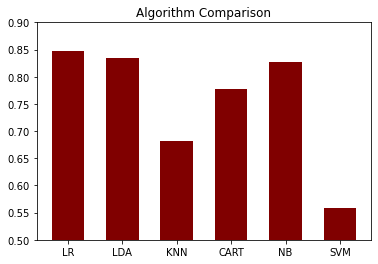

In [35]:
results = []
names = []
res = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res.append(cv_results.mean())
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

pyplot.ylim(.5, .9)
pyplot.bar(names, res, color ='maroon', width = 0.6)

pyplot.title('Algorithm Comparison')
pyplot.show()
